In [1]:
# %%
""" Submission for Homework 1 - Using OLS """

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm


Matplotlib is building the font cache; this may take a moment.


In [2]:
# %%
### Part 0 - Building a Manual Regression Formula
# ==========================================================


def my_linear_regression(y, xs):
    """Build reusable linear regression function for manual estimation"""
    betas = pd.DataFrame(np.linalg.inv(xs.T @ xs) @ xs.T @ y)
    cols = {}
    j = 0
    for name, _ in xs.items():
        cols.update({j: name})
        j += 1
    betas = betas.rename(index=cols)
    return betas


def my_r2(es, y):
    """Build reusable r-squared function for manual estimation"""
    y_m = y.mean()
    r2 = 1 - ((es.T @ es) / ((y - y_m).T @ (y - y_m)))
    return r2



In [3]:
# %%
### Part 1 - Regression
# ==========================================================


In [4]:
# %%
## Q1.)
# ----------------------------------------------------------

# Setting up dataframes
df_index_returns = pd.read_excel("../data/multi_asset_etf_data.xlsx", "total returns")
df_spy_returns = df_index_returns["SPY"]
df_portfolio_returns = pd.read_excel(
    "../data/multi_asset_etf_data.xlsx", "portfolio returns"
)["portfolio"]

# Manual regression practice
# Add a constant to our regressors
df_spy_returns = sm.add_constant(df_spy_returns)

# Calculating betas and R-squared
my_betas_q1 = my_linear_regression(df_portfolio_returns, df_spy_returns)
my_e_q1 = df_portfolio_returns - (df_spy_returns @ my_betas_q1)[0]
my_r2_q1 = my_r2(my_e_q1, df_portfolio_returns)

# Returns betas and r-squared values
for i, beta in enumerate(my_betas_q1[0]):
    print(f"Beta {i} is {round(beta, 4)}")
print(f"Our R-squared value is {my_r2_q1.round(3)}")

# Calculating beta w/ sm
sm_model_q1 = sm.OLS(df_portfolio_returns, df_spy_returns)
sm_betas_q1 = sm_model_q1.fit()
print(sm_betas_q1.summary())


Beta 0 is -0.0016
Beta 1 is 0.6525
Our R-squared value is 0.762
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     575.0
Date:                Thu, 01 Aug 2024   Prob (F-statistic):           6.19e-58
Time:                        06:41:47   Log-Likelihood:                 499.84
No. Observations:                 182   AIC:                            -995.7
Df Residuals:                     180   BIC:                            -989.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [5]:
# %%
## Q2.)
# ----------------------------------------------------------

# Setting up dataframes
df_hyg_returns = df_index_returns["HYG"]
df_spy_returns = pd.DataFrame(df_spy_returns)
df_q2_returns = df_spy_returns.join(df_hyg_returns)

# Manual regression practice
# Calculating betas and R-squared
my_betas_q2 = my_linear_regression(df_portfolio_returns, df_q2_returns)
my_e_q2 = df_portfolio_returns - (df_q2_returns @ my_betas_q2)[0]
my_r2_q2 = my_r2(my_e_q2, df_portfolio_returns)

# Returns betas and r-squared values
for i, beta in enumerate(my_betas_q2[0]):
    print(f"Beta {i} is {round(beta, 4)}")
print(f"Our R-squared value is {my_r2_q2.round(3)}")

# Calculating beta w/ sm
sm_model_q2 = sm.OLS(df_portfolio_returns, df_q2_returns)
sm_betas_q2 = sm_model_q2.fit()
print(sm_betas_q2.summary())


Beta 0 is -0.0017
Beta 1 is 0.4048
Beta 2 is 0.537
Our R-squared value is 0.835
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     454.1
Date:                Thu, 01 Aug 2024   Prob (F-statistic):           7.57e-71
Time:                        06:41:47   Log-Likelihood:                 533.53
No. Observations:                 182   AIC:                            -1061.
Df Residuals:                     179   BIC:                            -1051.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [6]:
# %%
## Q3.)
# ----------------------------------------------------------

# Calculating fitted values using sm package
fitted_values = sm_betas_q2.fittedvalues
print("Below, we have the set of fitted values using our estimated parameters:")
print(fitted_values)
print("Here, we have the difference between each pair of actual and fitted values:")
print(df_portfolio_returns - fitted_values)
print(
    "We observe that the differences are very small, and this is in line with \n"
    + "the high R-squared score that we calculated in Q2. A high R-squared \n"
    + "means that our model explains a large portion of the observed values."
)


Below, we have the set of fitted values using our estimated parameters:
0      0.112896
1      0.037324
2      0.016062
3      0.065683
4      0.004169
         ...   
177    0.005400
178    0.021083
179    0.017418
180   -0.025249
181    0.021828
Length: 182, dtype: float64
Here, we have the difference between each pair of actual and fitted values:
0      0.017550
1     -0.016396
2     -0.013168
3      0.002489
4      0.038039
         ...   
177   -0.020528
178   -0.006564
179    0.000857
180   -0.016066
181    0.000602
Length: 182, dtype: float64
We observe that the differences are very small, and this is in line with 
the high R-squared score that we calculated in Q2. A high R-squared 
means that our model explains a large portion of the observed values.


In [7]:
# %%
## Q4.)
# ----------------------------------------------------------
print(
    "    In the univariate model, our beta-value for the SPY returns were \n"
    + f"{round(my_betas_q1[0][1] - my_betas_q2[0][1], 4)} higher "
    + f"although our R-squared score was {(my_r2_q2 - my_r2_q1).round(3)}"
    + " lower.\nThis tells us a few things. Firstly, it shows us that"
    + " the returns \nfor SPY and HYG are highly correlated. In combination"
    + f" their \nmovements explain {my_r2_q2.round(3)} of our model. "
    + "\n    We also "
    + "see this relationship in how the beta for SPY returns drop as we\n"
    + "introduce HYG returns. This additional regressor gives the model\n"
    + "more flexibility in assigning weights to each index."
)


    In the univariate model, our beta-value for the SPY returns were 
0.2477 higher although our R-squared score was 0.074 lower.
This tells us a few things. Firstly, it shows us that the returns 
for SPY and HYG are highly correlated. In combination their 
movements explain 0.835 of our model. 
    We also see this relationship in how the beta for SPY returns drop as we
introduce HYG returns. This additional regressor gives the model
more flexibility in assigning weights to each index.


/var/folders/cj/18qyskt93d727jykntbfmn8h0000gn/T/ipykernel_19137/1008687659.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  + f"{round(my_betas_q1[0][1] - my_betas_q2[0][1], 4)} higher "


In [8]:
# %%
## Q5.)
# ----------------------------------------------------------

ANSWER_TEXT = """
    I would assume that the correlation would be higher between the sample 
residuals from our univariate model and the returns from HYG than the
correlation between the sample residuals from our multivariate model and the
returns from HYG. This is because the affect of HYG on our portfolio was
implicitly included in the univariate residuals. In our multivariate model,
however, all of the affect of the HYG index was captured by beta_HYG and
was therefore no longer featured in the model's residuals.
"""

print(ANSWER_TEXT)



    I would assume that the correlation would be higher between the sample 
residuals from our univariate model and the returns from HYG than the
correlation between the sample residuals from our multivariate model and the
returns from HYG. This is because the affect of HYG on our portfolio was
implicitly included in the univariate residuals. In our multivariate model,
however, all of the affect of the HYG index was captured by beta_HYG and
was therefore no longer featured in the model's residuals.



In [9]:
# %%
### Part 2 - Decomposing & Replicating
# ==========================================================


In [10]:
# %%
## Q1.)
# ----------------------------------------------------------

# Drop 'Date' column from our dataframe and add constant
df_all_indices = df_index_returns.drop(columns=["Date"])
df_all_indices = sm.add_constant(df_all_indices)

# Calculate and report betas, R-squared
all_betas_model = sm.OLS(df_portfolio_returns, df_all_indices)
all_betas = all_betas_model.fit()
print(all_betas.summary())

# Prepare and print ANSWER_TEXT
ANSWER_TEXT = """
    --> The regression finds that the portfolio is made of PSP, QAI,
IYR, and IEF in equal parts.
    --> This estimation is absolute. The R-squared score is 1.00 and,
for the identified component indices, the t-stats are essentially 0.
"""

print(ANSWER_TEXT)


                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.246e+28
Date:                Thu, 01 Aug 2024   Prob (F-statistic):               0.00
Time:                        06:41:47   Log-Likelihood:                 6127.2
No. Observations:                 182   AIC:                        -1.223e+04
Df Residuals:                     169   BIC:                        -1.219e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.735e-16   5.69e-17     10.087      0.0

In [11]:
# %%
## Q2.)
# ----------------------------------------------------------

# (a) Building the Model & Reporting Values
# Setting date cutoff to separate data
cutoff = pd.Timestamp(2021, 1, 1, 0, 0)

# Building pre- and post- datasets for all indices
pre_2020_all_data = df_index_returns[df_index_returns["Date"] < cutoff]
post_2020_all_data = df_index_returns[df_index_returns["Date"] > cutoff]

# Store and remove date column and add constant
dates_past = pre_2020_all_data["Date"]
dates_future = post_2020_all_data["Date"]
pre_2020_all_data = pre_2020_all_data.drop(columns=["Date"])
pre_2020_all_data = pd.DataFrame(sm.add_constant(pre_2020_all_data))
post_2020_all_data = post_2020_all_data.drop(columns=["Date"])
post_2020_all_data = pd.DataFrame(sm.add_constant(post_2020_all_data))

# Separating by EEM and others for pre-, post- 2020
pre_2020_EEM = pre_2020_all_data["EEM"]
PRE_2020_OTHERS = pre_2020_all_data.drop(columns=["EEM"])
post_2020_EEM = post_2020_all_data["EEM"]
POST_2020_OTHERS = post_2020_all_data.drop(columns=["EEM"])

# Calculate betas, r-2
pre_2020_EEM_model = sm.OLS(pre_2020_EEM, PRE_2020_OTHERS)
pre_2020_results = pre_2020_EEM_model.fit()
print("Our resulting beta vector is:")
print(pre_2020_results.params)
print("Our corresponding R-squared value is: ", end="")
print(round(pre_2020_results.rsquared, 3))


Our resulting beta vector is:
const   -0.001269
SPY     -0.112087
EFA      0.499741
PSP     -0.003538
QAI      0.760849
HYG      0.301275
DBC     -0.007864
IYR      0.068293
IEF     -0.981504
BWX      0.545010
TIP      0.694261
SHV      3.569074
dtype: float64
Our corresponding R-squared value is: 0.82


In [12]:
# %%
# (b) Reporting t-stats
print(pre_2020_results.summary())

# Prepare and print ANSWER_TEXT
ANSWER_TEXT = """
    EFA, IEF, BWX, and TIP report t-stats with an absolute value
above 2. QAI is very close, and I am inclined to include it as it
still reports a p-score less than 0.05.
"""

print(ANSWER_TEXT)


                            OLS Regression Results                            
Dep. Variable:                    EEM   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     53.54
Date:                Thu, 01 Aug 2024   Prob (F-statistic):           1.09e-42
Time:                        06:41:47   Log-Likelihood:                 323.57
No. Observations:                 141   AIC:                            -623.1
Df Residuals:                     129   BIC:                            -587.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.003     -0.436      0.6

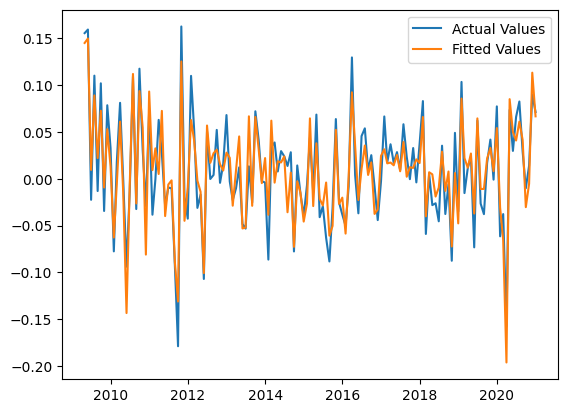

In [13]:
# %%
# (c) Plotting EEM returns against fitted values
# Generating fitted values
pre_2020_EEM_fitted_values = pre_2020_results.fittedvalues

# Plotting points against one another
plt.plot(dates_past, pre_2020_EEM, label="Actual Values")
plt.plot(dates_past, pre_2020_EEM_fitted_values, label="Fitted Values")
plt.legend()
plt.show()


In [14]:
# %%
## Q3.)
# ----------------------------------------------------------


In [15]:
# %%
# (a)
# Solving for fitted values of EEM post-2020
post_2020_EEM_fitted_values = (pre_2020_results.params).T @ POST_2020_OTHERS.T
post_2020_residuals = post_2020_EEM - post_2020_EEM_fitted_values
post_2020_r2 = my_r2(post_2020_residuals, post_2020_EEM)

ANSWER_TEXT = f"""
    The r-squared value between the actual returns of the
out-of-sample indices and the fitted values for the EEM
index is {round( post_2020_r2, 4)}. This tells us that our fitted values account 
for {round(post_2020_r2 * 100, 2)}% of the variation in our observed values for
the EEM index post-2020. We also note that the correlation
coefficient between the observed and fitted values is
{round( np.corrcoef(post_2020_EEM, post_2020_EEM_fitted_values)[0][1] , 4)}.
"""

print(ANSWER_TEXT)



    The r-squared value between the actual returns of the
out-of-sample indices and the fitted values for the EEM
index is 0.5066. This tells us that our fitted values account 
for 50.66% of the variation in our observed values for
the EEM index post-2020. We also note that the correlation
coefficient between the observed and fitted values is
0.8026.




    The r-squared for the out-of-sample test was 0.314 lower than it was
for the in-sample test. This makes sense, as the in-sample data was trained
on the very data it was then tested on. This precipitous decrease in r-squared
is a sign that this model is not the best at forecasting the movement of the
EEM index. For visual confirmation, I've also included the chart of both our
fitted values and the actual values.



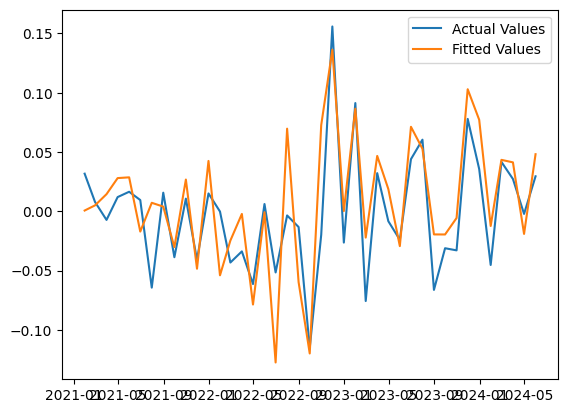

In [16]:
# %%
# (b)
# Comparing to in-sample results
R2_DIFF = round(pre_2020_results.rsquared - post_2020_r2, 3)
ANSWER_TEXT = f"""
    The r-squared for the out-of-sample test was {R2_DIFF} lower than it was
for the in-sample test. This makes sense, as the in-sample data was trained
on the very data it was then tested on. This precipitous decrease in r-squared
is a sign that this model is not the best at forecasting the movement of the
EEM index. For visual confirmation, I've also included the chart of both our
fitted values and the actual values.
"""

print(ANSWER_TEXT)

# Plotting points against one another
plt.plot(dates_future, post_2020_EEM, label="Actual Values")
plt.plot(dates_future, post_2020_EEM_fitted_values, label="Fitted Values")
plt.legend()
plt.show()

In [17]:
# %%
